In [5]:
from scipy import sparse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN, KMeans

In [6]:
RANDOM_STATE = 42

In [7]:
train = sparse.load_npz("train.npz")

In [8]:
train.shape

(14590, 77888)

In [9]:
data = train.toarray()

In [10]:
np.count_nonzero(data)

2026769

In [11]:
data.shape[0]*data.shape[1]

1136385920

In [12]:
np.isnan(data).sum()

0

In [37]:
model_kmeans = KMeans(n_clusters=5, random_state=RANDOM_STATE, n_init='auto').fit(data)

In [41]:
def kmeans_iter_and_save(data, clusters):
    for i in clusters:
        model_kmeans = KMeans(n_clusters=i, random_state=RANDOM_STATE, n_init='auto').fit(data)
        result_kmeans = pd.DataFrame({'ID': range(data.shape[0]) , 'TARGET' : model_kmeans.labels_})
        result_kmeans.set_index('ID', inplace=True)
        result_kmeans.to_csv(f'eval_Kmeans_{i}_clusters.csv')

In [43]:
kmeans_iter_and_save(data,[7,13])

In [38]:
model_kmeans.labels_

array([2, 2, 2, ..., 2, 0, 3])

In [39]:
result_kmeans = pd.DataFrame({'ID': range(data.shape[0]) , 'TARGET' : model_kmeans.labels_})
result_kmeans.set_index('ID', inplace=True)

In [40]:
result_kmeans.to_csv('eval_Kmeans.csv')

In [45]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA(n_components=2, random_state=RANDOM_STATE)

In [63]:
data_pca = pca.fit_transform(data)

In [64]:
data_pca.shape

(14590, 2)

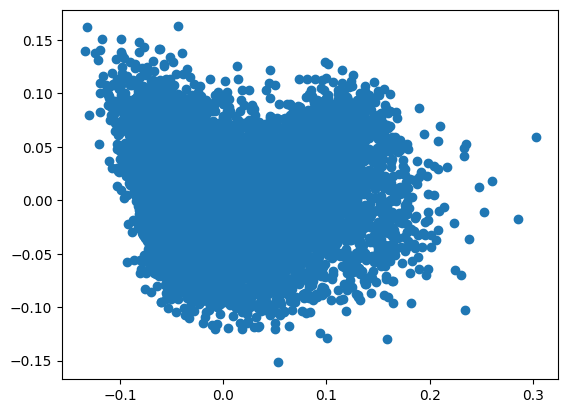

In [71]:
plt.scatter(data_pca[:, 0], data_pca[:, 1])

In [98]:
model_kmeans = KMeans(n_clusters=7, random_state=RANDOM_STATE, n_init='auto')
model_kmeans.fit(data_pca)

KMeans(n_clusters=7, n_init='auto', random_state=42)

In [94]:
model_kmeans.cluster_centers_

array([[-0.0372532 ,  0.03113404],
       [ 0.09005145,  0.01538129],
       [-0.01130874, -0.03069338]])

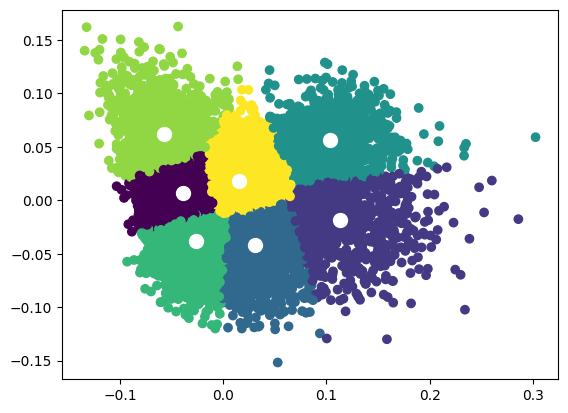

In [99]:

fig, ax = plt.subplots()
ax = plt.scatter( data_pca[:, 0], data_pca[:, 1], c=model_kmeans.labels_)
ax = plt.plot(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1],'wo', markersize=10)

In [69]:
result_kmeans = pd.DataFrame({'ID': range(data.shape[0]) , 'TARGET' : model_kmeans.labels_})
result_kmeans.set_index('ID', inplace=True)
result_kmeans.to_csv(f'eval_Kmeans_7_clusters_with_PCA.csv')

tsne

DBSCAN

In [25]:
model_dbscan = DBSCAN(eps=0.5, min_samples=5)


In [26]:
model_dbscan.fit(data)

DBSCAN()

In [44]:
model_dbscan.get_params()

{'algorithm': 'auto',
 'eps': 0.5,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 5,
 'n_jobs': None,
 'p': None}